In [6]:
from ase import io
from ase import Atoms
from scipy.stats import gaussian_kde
import numpy as np
import torch

import pyemma
import mdtraj as md
import MDAnalysis as mda
from MDAnalysis import analysis
from MDAnalysis.analysis import dihedrals
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt 
import matplotlib

import numpy.ma as ma
import itertools
import re
import pandas as pd
import glob
import seaborn as sns

import math

/home/erin/miniconda3/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def load_protein_traj(traj, top=None, ntraj=200): 
    trajs = [md.load(traj)]
    if len(trajs):    
        traj = md.join(trajs)
                   
    return traj

In [3]:
def get_atomNum(traj):
    
    atomic_nums = [atom.element.number for atom in traj.top.atoms]
    
    protein_index = traj.top.select("protein")
    protein_top = traj.top.subset(protein_index)

    atomic_nums = [atom.element.number for atom in protein_top.atoms]
    
    return np.array(atomic_nums), protein_index

## Loading files

In [4]:
ncgs5_eIF4E_cg2all='/home/erin/Documents/cg2all/2step/eIF4E/ncg5_FG_recon_clean.pdb'
ncgs10_eIF4E_cg2all= '/home/erin/Documents/cg2all/2step/eIF4E/ncg10_FG_recon_clean.pdb'
ncgs19_eIF4E_cg2all='/home/erin/Documents/cg2all/2step/eIF4E/ncg19_FG_recon_clean.pdb'
ncgs50_eIF4E_cg2all= '/home/erin/Documents/cg2all/2step/eIF4E/ncg50_FG_recon_clean.pdb' 
#pdb_trunc = '/home/erin/Documents/CoarseGrainingVAE/data/eIF4E/truncated.pdb'
#ncgs10_data = get_dihedrals(ncgs10, pdb_trunc)
ground_truth = '/home/erin/Documents/cg2all/2step/eIF4E/FG_ground_truth_clean.pdb'
#pdb = '/home/erin/Documents/CoarseGrainingVAE/data/eIF4E/eIF4E.pdb'
ncgs_10_1step = '/home/erin/Documents/CoarseGrainingVAE/scripts/final_data/mxr2b3ec_recon.pdb'
ncgs_19_1step = '/home/erin/Documents/CoarseGrainingVAE/scripts/final_data/nlxj8a4v_recon.pdb'
ncgs_50_1step = '/home/erin/Documents/CoarseGrainingVAE/scripts/final_data/s1954b2s_recon.pdb'
ground_truth_1step = '/home/erin/Documents/CoarseGrainingVAE/data/eIF4E/test_true.pdb'
pdb_1step = '/home/erin/Documents/CoarseGrainingVAE/data/eIF4E/top.pdb'

In [5]:
ncgs5_eIF4E_genzprot = "/home/erin/Documents/CoarseGrainingVAE/scripts/final_data/ncgs_5reconstructed_FG_traj.pdb"
ncgs10_eIF4E_genzprot = "/home/erin/Documents/CoarseGrainingVAE/scripts/final_data/1xgt0cil_ncgs10_recon/ncgs_181reconstructed_FG_traj.pdb"
ncgs19_eIF4E_genzprot = "/home/erin/Documents/CoarseGrainingVAE/scripts/final_data/z58m9lxr_ncgs19_recon/ncgs_181reconstructed_FG_traj.pdb"
ncgs50_eIF4E_genzprot = "/home/erin/Documents/CoarseGrainingVAE/scripts/final_data/t6gcmgrz_ncgs50_recon/ncgs_181reconstructed_FG_traj.pdb"
ncgs5_eIF4E_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/eIF4E/eIF4Encg5_recon_gen_0_clean.pdb"
ncgs10_eIF4E_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/eIF4E/1xgt0cil_recon_gen_0_clean.pdb"
ncgs19_eIF4E_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/eIF4E/z58m9lxr_recon_gen_0_clean.pdb"
ncgs50_eIF4E_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/eIF4E/t6gcmgrz_recon_gen_0_clean.pdb"

In [18]:
ncgs5_plpro_cg2all = "/home/erin/Documents/cg2all/2step/sarscov2/ncg5_FG_recon_clean.pdb"
ncgs15_plpro_cg2all = "/home/erin/Documents/cg2all/2step/sarscov2/ncg15_FG_recon_clean.pdb"
ncgs25_plpro_cg2all = "/home/erin/Documents/cg2all/2step/sarscov2/ncg25_FG_recon_clean.pdb"
ncgs35_plpro_cg2all = "/home/erin/Documents/cg2all/2step/sarscov2/ncg35_FG_recon_clean.pdb"
ncgs100_plpro_cg2all = "/home/erin/Documents/cg2all/2step/sarscov2/ncg100_FG_recon_clean.pdb"
ncgs5_plpro_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/plpro/ncg5_recon_gen_0_clean.pdb"
ncgs15_plpro_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/plpro/ncg15_recon_gen_0_clean.pdb"
ncgs25_plpro_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/plpro/ncg25_recon_gen_0_clean.pdb"
ncgs35_plpro_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/plpro/ncg35_recon_gen_0_clean.pdb"
ncgs100_plpro_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/plpro/ncg100_recon_gen_0_clean.pdb"
ground_truth_plpro = "/home/erin/Documents/cg2all/2step/sarscov2/FG_ground_truth_clean.pdb"
ncgs25_1step_plpro = "/home/erin/Documents/CoarseGrainingVAE/sarscov2/1step25_recon_clean.pdb"
ncgs35_1step_plpro = "/home/erin/Documents/CoarseGrainingVAE/sarscov2/11yei93k_recon_clean.pdb"
ncgs100_1step_plpro = "/home/erin/Documents/CoarseGrainingVAE/sarscov2/w28hcps4_recon_clean.pdb"

## Dihedral analysis

In [7]:
# using mdanalysis to plot ramachandran
u_5_eIF4E_cg2all = mda.Universe(ncgs5_eIF4E_cg2all)
R_5_eIF4E_cg2all = mda.analysis.dihedrals.Ramachandran(u_5_eIF4E_cg2all, select='protein').run()
u_10_eIF4E_cg2all = mda.Universe(ncgs10_eIF4E_cg2all)
R_10_eIF4E_cg2all = mda.analysis.dihedrals.Ramachandran(u_10_eIF4E_cg2all, select='protein').run()
u_19_eIF4E_cg2all = mda.Universe(ncgs19_eIF4E_cg2all)
R_19_eIF4E_cg2all = mda.analysis.dihedrals.Ramachandran(u_19_eIF4E_cg2all, select='protein').run()
u_50_eIF4E_cg2all = mda.Universe(ncgs50_eIF4E_cg2all)
R_50_eIF4E_cg2all = mda.analysis.dihedrals.Ramachandran(u_50_eIF4E_cg2all, select='protein').run()
u_truth = mda.Universe(ground_truth)
R_truth = mda.analysis.dihedrals.Ramachandran(u_truth, select='protein').run()
u_10_1step = mda.Universe(ncgs_10_1step)
R_10_1step = mda.analysis.dihedrals.Ramachandran(u_10_1step, select='protein').run()
u_19_1step = mda.Universe(ncgs_19_1step)
R_19_1step = mda.analysis.dihedrals.Ramachandran(u_19_1step, select='protein').run()
u_50_1step = mda.Universe(ncgs_50_1step)
R_50_1step = mda.analysis.dihedrals.Ramachandran(u_50_1step, select='protein').run()
u_truth_1step = mda.Universe(ground_truth_1step)
R_truth_1step = mda.analysis.dihedrals.Ramachandran(u_truth_1step, select='protein').run()

/home/erin/miniconda3/envs/pytorch/lib/python3.9/site-packages/MDAnalysis/analysis/dihedrals.py:400: UserWarning: Cannot determine phi and psi angles for the first or last residues
  warnings.warn("Cannot determine phi and psi angles for the first "
/home/erin/miniconda3/envs/pytorch/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:447: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


In [8]:
u_5_eIF4E_genzprot = mda.Universe(ncgs5_eIF4E_genzprot)
R_5_eIF4E_genzprot = mda.analysis.dihedrals.Ramachandran(u_5_eIF4E_genzprot, select='protein').run()
u_10_eIF4E_genzprot = mda.Universe(ncgs10_eIF4E_genzprot)
R_10_eIF4E_genzprot = mda.analysis.dihedrals.Ramachandran(u_10_eIF4E_genzprot, select='protein').run()
u_19_eIF4E_genzprot = mda.Universe(ncgs19_eIF4E_genzprot)
R_19_eIF4E_genzprot = mda.analysis.dihedrals.Ramachandran(u_19_eIF4E_genzprot, select='protein').run()
u_50_eIF4E_genzprot = mda.Universe(ncgs50_eIF4E_genzprot)
R_50_eIF4E_genzprot = mda.analysis.dihedrals.Ramachandran(u_50_eIF4E_genzprot, select='protein').run()

In [9]:
u_5_eIF4E_diffback = mda.Universe(ncgs5_eIF4E_diffback)
R_5_eIF4E_diffback = mda.analysis.dihedrals.Ramachandran(u_5_eIF4E_diffback, select='protein').run()
u_10_eIF4E_diffback = mda.Universe(ncgs10_eIF4E_diffback)
R_10_eIF4E_diffback = mda.analysis.dihedrals.Ramachandran(u_10_eIF4E_diffback, select='protein').run()
u_19_eIF4E_diffback = mda.Universe(ncgs19_eIF4E_diffback)
R_19_eIF4E_diffback = mda.analysis.dihedrals.Ramachandran(u_19_eIF4E_diffback, select='protein').run()
u_50_eIF4E_diffback = mda.Universe(ncgs50_eIF4E_diffback)
R_50_eIF4E_diffback = mda.analysis.dihedrals.Ramachandran(u_50_eIF4E_diffback, select='protein').run()

In [7]:
u_5_plpro_cg2all = mda.Universe(ncgs5_plpro_cg2all)
R_5_plpro_cg2all = mda.analysis.dihedrals.Ramachandran(u_5_plpro_cg2all, select='protein').run()
u_15_plpro_cg2all = mda.Universe(ncgs15_plpro_cg2all)
R_15_plpro_cg2all = mda.analysis.dihedrals.Ramachandran(u_15_plpro_cg2all, select='protein').run()
u_25_plpro_cg2all = mda.Universe(ncgs25_plpro_cg2all)
R_25_plpro_cg2all = mda.analysis.dihedrals.Ramachandran(u_25_plpro_cg2all, select='protein').run()
u_35_plpro_cg2all = mda.Universe(ncgs35_plpro_cg2all)
R_35_plpro_cg2all = mda.analysis.dihedrals.Ramachandran(u_35_plpro_cg2all, select='protein').run()
u_100_plpro_cg2all = mda.Universe(ncgs100_plpro_cg2all)
R_100_plpro_cg2all = mda.analysis.dihedrals.Ramachandran(u_100_plpro_cg2all, select='protein').run()
u_truth_plpro = mda.Universe(ground_truth_plpro)
R_truth_plpro = mda.analysis.dihedrals.Ramachandran(u_truth_plpro, select='protein').run()
u_25_1step_plpro = mda.Universe(ncgs25_1step_plpro)
R_25_1step_plpro = mda.analysis.dihedrals.Ramachandran(u_25_1step_plpro, select='protein').run()
u_35_1step_plpro = mda.Universe(ncgs35_1step_plpro)
R_35_1step_plpro = mda.analysis.dihedrals.Ramachandran(u_35_1step_plpro, select='protein').run()
u_100_1step_plpro = mda.Universe(ncgs100_1step_plpro)
R_100_1step_plpro = mda.analysis.dihedrals.Ramachandran(u_100_1step_plpro, select='protein').run()

/home/erin/miniconda3/envs/pytorch/lib/python3.9/site-packages/MDAnalysis/analysis/dihedrals.py:400: UserWarning: Cannot determine phi and psi angles for the first or last residues
  warnings.warn("Cannot determine phi and psi angles for the first "
/home/erin/miniconda3/envs/pytorch/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:447: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/erin/miniconda3/envs/pytorch/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:442: UserWarning: PDB file contained CONECT record to TER entry. These are not included in bonds.
  warnings.warn(


In [8]:
u_5_plpro_diffback = mda.Universe(ncgs5_plpro_diffback)
R_5_plpro_diffback = mda.analysis.dihedrals.Ramachandran(u_5_plpro_diffback, select='protein').run()
u_15_plpro_diffback = mda.Universe(ncgs15_plpro_diffback)
R_15_plpro_diffback = mda.analysis.dihedrals.Ramachandran(u_15_plpro_diffback, select='protein').run()
u_25_plpro_diffback = mda.Universe(ncgs25_plpro_diffback)
R_25_plpro_diffback = mda.analysis.dihedrals.Ramachandran(u_25_plpro_diffback, select='protein').run()
u_35_plpro_diffback = mda.Universe(ncgs35_plpro_diffback)
R_35_plpro_diffback = mda.analysis.dihedrals.Ramachandran(u_35_plpro_diffback, select='protein').run()
u_100_plpro_diffback = mda.Universe(ncgs100_plpro_diffback)
R_100_plpro_diffback = mda.analysis.dihedrals.Ramachandran(u_100_plpro_diffback, select='protein').run()

In [12]:
dih_list_eIF4E_cg2all = [R_5_eIF4E_cg2all, R_10_eIF4E_cg2all, R_19_eIF4E_cg2all, R_50_eIF4E_cg2all]
dih_list_true_eIF4E = [R_truth]
dih_list_eIF4E_genzprot = [R_5_eIF4E_genzprot, R_10_eIF4E_genzprot, R_19_eIF4E_genzprot, R_50_eIF4E_genzprot]
dih_list_eIF4E_diffback = [R_5_eIF4E_diffback, R_10_eIF4E_diffback, R_19_eIF4E_diffback, R_50_eIF4E_diffback]

In [9]:
dih_list_plpro_cg2all = [R_5_plpro_cg2all, R_15_plpro_cg2all, R_25_plpro_cg2all, R_35_plpro_cg2all, R_100_plpro_cg2all]
dih_list_plpro_diffback = [R_5_plpro_diffback, R_15_plpro_diffback, R_25_plpro_diffback, R_35_plpro_diffback, R_100_plpro_diffback]
dih_list_true_plpro = [R_truth_plpro]

In [20]:
def normalise(x):
    x = x / 180 * np.pi
    if np.any(x > np.pi):
        x -= np.pi
    return x

In [15]:
phi_psi_true_eIF4E = normalise(np.concatenate([dih.results.angles.reshape(np.prod(dih.results.angles.shape[:2]), 2) for dih in dih_list_true_eIF4E], axis=0))

In [11]:
phi_psi_true_plpro = normalise(np.concatenate([dih.results.angles.reshape(np.prod(dih.results.angles.shape[:2]), 2) for dih in dih_list_true_plpro], axis=0))

In [12]:
phi_psi_5_eIF4E_cg2all= normalise(np.concatenate([R_5_eIF4E_cg2all.results.angles.reshape(np.prod(R_5_eIF4E_cg2all.results.angles.shape[:2]), 2)], axis=0))
phi_psi_10_eIF4E_cg2all = normalise(np.concatenate([R_10_eIF4E_cg2all.results.angles.reshape(np.prod(R_10_eIF4E_cg2all.results.angles.shape[:2]), 2)], axis=0))
phi_psi_19_eIF4E_cg2all = normalise(np.concatenate([R_19_eIF4E_cg2all.results.angles.reshape(np.prod(R_19_eIF4E_cg2all.results.angles.shape[:2]), 2)], axis=0))
phi_psi_50_eIF4E_cg2all = normalise(np.concatenate([R_50_eIF4E_cg2all.results.angles.reshape(np.prod(R_50_eIF4E_cg2all.results.angles.shape[:2]), 2)], axis=0))
phi_psi_10_1step_eIF4E = normalise(np.concatenate([R_10_1step.results.angles.reshape(np.prod(R_10_1step.results.angles.shape[:2]), 2)], axis=0))
phi_psi_19_1step_eIF4E = normalise(np.concatenate([R_19_1step.results.angles.reshape(np.prod(R_19_1step.results.angles.shape[:2]), 2)], axis=0))
phi_psi_50_1step_eIF4E = normalise(np.concatenate([R_50_1step.results.angles.reshape(np.prod(R_50_1step.results.angles.shape[:2]), 2)], axis=0))
phi_psi_5_eIF4E_genzprot = normalise(np.concatenate([R_5_eIF4E_genzprot.results.angles.reshape(np.prod(R_5_eIF4E_genzprot.results.angles.shape[:2]), 2)], axis=0))
phi_psi_10_eIF4E_genzprot = normalise(np.concatenate([R_10_eIF4E_genzprot.results.angles.reshape(np.prod(R_10_eIF4E_genzprot.results.angles.shape[:2]), 2)], axis=0))
phi_psi_19_eIF4E_genzprot = normalise(np.concatenate([R_19_eIF4E_genzprot.results.angles.reshape(np.prod(R_19_eIF4E_genzprot.results.angles.shape[:2]), 2)], axis=0))
phi_psi_50_eIF4E_genzprot = normalise(np.concatenate([R_50_eIF4E_genzprot.results.angles.reshape(np.prod(R_50_eIF4E_genzprot.results.angles.shape[:2]), 2)], axis=0))
phi_psi_5_eIF4E_diffback = normalise(np.concatenate([R_5_eIF4E_diffback.results.angles.reshape(np.prod(R_5_eIF4E_diffback.results.angles.shape[:2]), 2)], axis=0))
phi_psi_10_eIF4E_diffback = normalise(np.concatenate([R_10_eIF4E_diffback.results.angles.reshape(np.prod(R_10_eIF4E_diffback.results.angles.shape[:2]), 2)], axis=0))
phi_psi_19_eIF4E_diffback = normalise(np.concatenate([R_19_eIF4E_diffback.results.angles.reshape(np.prod(R_19_eIF4E_diffback.results.angles.shape[:2]), 2)], axis=0))
phi_psi_50_eIF4E_diffback = normalise(np.concatenate([R_50_eIF4E_diffback.results.angles.reshape(np.prod(R_50_eIF4E_diffback.results.angles.shape[:2]), 2)], axis=0))

NameError: name 'R_5_eIF4E_cg2all' is not defined

In [13]:
phi_psi_5_plpro_cg2all = normalise(np.concatenate([R_5_plpro_cg2all.results.angles.reshape(np.prod(R_5_plpro_cg2all.results.angles.shape[:2]), 2)], axis=0))
phi_psi_15_plpro_cg2all = normalise(np.concatenate([R_15_plpro_cg2all.results.angles.reshape(np.prod(R_15_plpro_cg2all.results.angles.shape[:2]), 2)], axis=0))
phi_psi_25_plpro_cg2all = normalise(np.concatenate([R_25_plpro_cg2all.results.angles.reshape(np.prod(R_25_plpro_cg2all.results.angles.shape[:2]), 2)], axis=0))
phi_psi_35_plpro_cg2all = normalise(np.concatenate([R_35_plpro_cg2all.results.angles.reshape(np.prod(R_35_plpro_cg2all.results.angles.shape[:2]), 2)], axis=0))
phi_psi_100_plpro_cg2all = normalise(np.concatenate([R_100_plpro_cg2all.results.angles.reshape(np.prod(R_100_plpro_cg2all.results.angles.shape[:2]), 2)], axis=0))
phi_psi_5_plpro_diffback = normalise(np.concatenate([R_5_plpro_diffback.results.angles.reshape(np.prod(R_5_plpro_diffback.results.angles.shape[:2]), 2)], axis=0))
phi_psi_15_plpro_diffback = normalise(np.concatenate([R_15_plpro_diffback.results.angles.reshape(np.prod(R_15_plpro_diffback.results.angles.shape[:2]), 2)], axis=0))
phi_psi_25_plpro_diffback = normalise(np.concatenate([R_25_plpro_diffback.results.angles.reshape(np.prod(R_25_plpro_diffback.results.angles.shape[:2]), 2)], axis=0))
phi_psi_35_plpro_diffback = normalise(np.concatenate([R_35_plpro_diffback.results.angles.reshape(np.prod(R_35_plpro_diffback.results.angles.shape[:2]), 2)], axis=0))
phi_psi_100_plpro_diffback = normalise(np.concatenate([R_100_plpro_diffback.results.angles.reshape(np.prod(R_100_plpro_diffback.results.angles.shape[:2]), 2)], axis=0))
phi_psi_25_1step_plpro = normalise(np.concatenate([R_25_1step_plpro.results.angles.reshape(np.prod(R_25_1step_plpro.results.angles.shape[:2]), 2)], axis=0))
phi_psi_35_1step_plpro = normalise(np.concatenate([R_35_1step_plpro.results.angles.reshape(np.prod(R_35_1step_plpro.results.angles.shape[:2]), 2)], axis=0))
phi_psi_100_1step_plpro = normalise(np.concatenate([R_100_1step_plpro.results.angles.reshape(np.prod(R_100_1step_plpro.results.angles.shape[:2]), 2)], axis=0))

In [19]:
phi_psis_eIF4E_cg2all = [phi_psi_10_eIF4E_cg2all, phi_psi_19_eIF4E_cg2all, phi_psi_50_eIF4E_cg2all]
phi_psis_eIF4E_genzprot = [phi_psi_10_eIF4E_genzprot, phi_psi_19_eIF4E_genzprot, phi_psi_50_eIF4E_genzprot]
phi_psis_eIF4E_diffback = [phi_psi_10_eIF4E_diffback, phi_psi_19_eIF4E_diffback, phi_psi_50_eIF4E_diffback]
phi_psis_1step_eIF4E = [phi_psi_10_1step_eIF4E, phi_psi_19_1step_eIF4E, phi_psi_50_1step_eIF4E]
eIF4E_dih = [phi_psis_1step_eIF4E, phi_psis_eIF4E_genzprot, phi_psis_eIF4E_cg2all, phi_psis_eIF4E_diffback]
ncgs_labels_eIF4E = [10, 19, 50]
eIF4E_dih_extra = [[phi_psi_5_eIF4E_genzprot], [phi_psi_5_eIF4E_cg2all], [phi_psi_5_eIF4E_diffback]]
extra_ncgs_labels_eIF4E = [5]

In [14]:
phi_psis_plpro_cg2all = [phi_psi_25_plpro_cg2all, phi_psi_35_plpro_cg2all, phi_psi_100_plpro_cg2all]
phi_psis_plpro_diffback = [phi_psi_25_plpro_diffback, phi_psi_35_plpro_diffback, phi_psi_100_plpro_diffback]
phi_psis_1step_plpro = [phi_psi_25_1step_plpro, phi_psi_35_1step_plpro, phi_psi_100_1step_plpro]
plpro_dih = [phi_psis_1step_plpro, phi_psis_plpro_cg2all, phi_psis_plpro_diffback]
ncgs_labels_plpro = [25, 35, 100]
phi_psi_plpro_cg2all_extra = [phi_psi_5_plpro_cg2all, phi_psi_15_plpro_cg2all]
phi_psi_plpro_diffback_extra = [phi_psi_5_plpro_diffback, phi_psi_15_plpro_diffback]
plpro_dih_extra = [phi_psi_plpro_cg2all_extra, phi_psi_plpro_diffback_extra]
extra_ncgs_labels_plpro = [5, 15]

In [15]:
sns.set_theme(style="ticks")

In [35]:
eIF4E_palette_2step = sns.color_palette("husl", 8)
eIF4E_palette_1step = sns.color_palette("hls", 8)
eIF4E_palette_2step_extra = sns.color_palette("husl", 16)
eIF4E_palettes = [eIF4E_palette_1step, eIF4E_palette_2step, eIF4E_palette_2step, eIF4E_palette_2step]
eIF4E_palettes_extra = [eIF4E_palette_2step_extra, eIF4E_palette_2step_extra, eIF4E_palette_2step_extra]
# choose last three colors
colors_eIF4E = [5, 6, 7]
extra_colors_eIF4E = [-5]

In [23]:
plpro_palette_2step = sns.cubehelix_palette(start=1, gamma=0.6, rot=0.9, n_colors=16, reverse=True)
plpro_palette_1step = sns.cubehelix_palette(start=1, gamma=0.7, rot=0.9, n_colors=16, reverse=True)
plpro_palettes = [plpro_palette_1step, plpro_palette_2step, plpro_palette_2step]
plpro_palettes_extra = [plpro_palette_2step, plpro_palette_2step]
colors_plpro = [8, 11]
extra_colors_plpro = [-4, 0]

In [17]:
def plot_ramachandran(dih, truth, palettes, colors, cases, lab, step=None, figsize=(11, 7)):
    # Plot regular phi_psis
    fig, axes = plt.subplots(len(dih), len(cases), figsize=figsize)
    print(axes.shape)
    for i, step_dih in enumerate(dih):
        if len(dih) == 1:
            axis = axes
        elif len(cases)==1:
            axis = axes[i]
            axis = [axis]
        else:
            axis = axes[i, 0:]
        for j, (ax, phi_psi) in enumerate(zip(axis, step_dih)):
            ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
            ax.set_xticklabels([r'-$\pi$', r'-$\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
            ax.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
            ax.set_yticklabels([r'-$\pi$', r'-$\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
            #ax.set_xlabel(r'$\phi$')
            #ax.set_ylabel(r'$\psi$')
            if i==0:
                ax.set_title(f'{cases[j]} Beads', fontsize=12)
            sns.kdeplot(
                x=phi_psi[:, 0],
                y=phi_psi[:, 1],
                cmap=sns.color_palette(f"blend:#EEE,{palettes[i].as_hex()[colors[j]]}", as_cmap=True),
                fill=True, thresh=0.05, ax=ax, levels=10, bw_method=0.18
            )
            sns.kdeplot(
                x=phi_psi[:, 0],
                y=phi_psi[:, 1],
                color=palettes[i][colors[j]],
                fill=False, thresh=0.05, ax=ax, levels=10, linewidths=0.1, bw_method=0.18
            )
            sns.kdeplot(
                x=truth[:, 0],
                y=truth[:, 1],
                color=sns.color_palette("hls", 8)[0],
                fill=False, thresh=0.05, ax=ax, levels=10, linewidths=0.5, bw_method=0.18
            )
        if len(dih) == 1:
            axes.set_ylabel(step[0], fontsize=12, rotation=0, labelpad=40)
        elif len(cases)==1:
            for ax in range(axes.shape[0]):
                axes[ax].set_ylabel(step[ax], fontsize=12, rotation=0, labelpad=40)
        else:
            step_lab = f'{step[i]}'
            axes[i, 0].set_ylabel(step_lab, fontsize=12, rotation=0, labelpad=40)
    plt.tight_layout()
    plt.show()
    fig.savefig(f'{lab}.png', dpi=500)

In [ ]:
plot_ramachandran(eIF4E_dih, phi_psi_true_eIF4E, eIF4E_palettes, colors_eIF4E, ncgs_labels_eIF4E, 
                  'eIF4E_comparison_full_ramachandran', step=['1step', '2step\n GenZProt', '2step\n cg2all', '2step\n DiAMoNDBack'], figsize=(11, 10))

In [ ]:
plot_ramachandran(eIF4E_dih_extra, phi_psi_true_eIF4E, eIF4E_palettes_extra, extra_colors_eIF4E, extra_ncgs_labels_eIF4E, 
                  'eIF4E_ramachandran_extra', step=['2step\n GenZProt', '2step\n cg2all', '2step\n DiAMoNDBack'], figsize=(5, 8))

In [ ]:
plot_ramachandran(plpro_dih, phi_psi_true_plpro, plpro_palettes, colors_plpro, ncgs_labels_plpro, 'plpro_comparison_ramachandran',
                  step=['1step', '2step\n cg2all', '2step\n DiAMoNDBack'], figsize=(11, 8))

(2, 2)


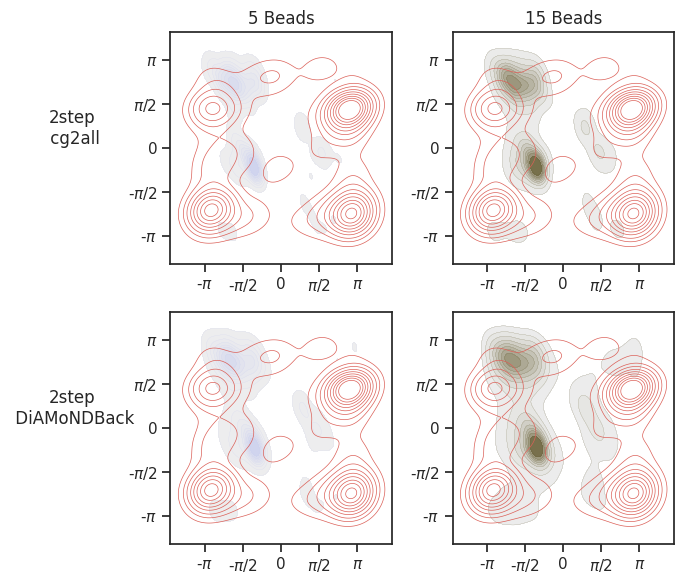

In [24]:
plot_ramachandran(plpro_dih_extra, phi_psi_true_plpro, plpro_palettes_extra, extra_colors_plpro, extra_ncgs_labels_plpro, 'plpro_ramachandran_extra',
                  step=['2step\n cg2all', '2step\n DiAMoNDBack'], figsize=(7, 6))

In [7]:
# 3 step
ncgs5_100_3step_plpro_cg2all = "/home/erin/Documents/cg2all/3step/sarscov2/ncg100_FG_recon_clean.pdb"
ncgs5_35_3step_plpro_cg2all = "/home/erin/Documents/cg2all/3step/sarscov2/ncg35_FG_recon_clean.pdb"
ncgs5_15_3step_plpro_cg2all = "/home/erin/Documents/cg2all/3step/sarscov2/ncg15_FG_recon_clean.pdb"
ncgs5_25_3step_plpro_cg2all = "/home/erin/Documents/cg2all/3step/sarscov2/ncg25_FG_recon_clean.pdb"

In [8]:
ncgs5_100_3step_plpro_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/plpro/ncg100_recon_gen_0_clean.pdb"
ncgs5_25_3step_plpro_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/plpro/ncg25_recon_gen_0_clean.pdb"
ncgs5_35_3step_plpro_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/plpro/ncg35_recon_gen_0_clean.pdb"
ncgs5_15_3step_plpro_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/plpro/ncg15_recon_gen_0_clean.pdb"

In [48]:
# get dihedrals
u_5_100_3step_plpro_cg2all = mda.Universe(ncg5_100_3step_plpro_cg2all)
R_5_100_3step_plpro_cg2all = mda.analysis.dihedrals.Ramachandran(u_5_100_3step_plpro_cg2all, select='protein').run()
u_5_35_3step_plpro_cg2all = mda.Universe(ncgs5_35_3step_plpro_cg2all)
R_5_35_3step_plpro_cg2all = mda.analysis.dihedrals.Ramachandran(u_5_35_3step_plpro_cg2all, select='protein').run()
u_5_15_3step_plpro_cg2all = mda.Universe(ncgs5_15_3step_plpro_cg2all)
R_5_15_3step_plpro_cg2all = mda.analysis.dihedrals.Ramachandran(u_5_15_3step_plpro_cg2all, select='protein').run()
u_5_25_3step_plpro_cg2all = mda.Universe(ncgs5_25_3step_plpro_cg2all)
R_5_25_3step_plpro_cg2all = mda.analysis.dihedrals.Ramachandran(u_5_25_3step_plpro_cg2all, select='protein').run()
u_5_100_3step_plpro_diffback = mda.Universe(ncg5_100_3step_plpro_diffback)
R_5_100_3step_plpro_diffback = mda.analysis.dihedrals.Ramachandran(u_5_100_3step_plpro_diffback, select='protein').run()
u_5_25_3step_plpro_diffback = mda.Universe(ncgs5_25_3step_plpro_diffback)
R_5_25_3step_plpro_diffback = mda.analysis.dihedrals.Ramachandran(u_5_25_3step_plpro_diffback, select='protein').run()
u_5_35_3step_plpro_diffback = mda.Universe(ncgs5_35_3step_plpro_diffback)
R_5_35_3step_plpro_diffback = mda.analysis.dihedrals.Ramachandran(u_5_35_3step_plpro_diffback, select='protein').run()
u_5_15_3step_plpro_diffback = mda.Universe(ncgs5_15_3step_plpro_diffback)
R_5_15_3step_plpro_diffback = mda.analysis.dihedrals.Ramachandran(u_5_15_3step_plpro_diffback, select='protein').run()

/home/erin/miniconda3/envs/pytorch/lib/python3.9/site-packages/MDAnalysis/analysis/dihedrals.py:400: UserWarning: Cannot determine phi and psi angles for the first or last residues
  warnings.warn("Cannot determine phi and psi angles for the first "
/home/erin/miniconda3/envs/pytorch/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:447: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


In [49]:
phi_psi_5_100_3step_plpro_cg2all = normalise(np.concatenate([R_5_100_3step_plpro_cg2all.results.angles.reshape(np.prod(R_5_100_3step_plpro_cg2all.results.angles.shape[:2]), 2)], axis=0))
phi_psi_5_35_3step_plpro_cg2all = normalise(np.concatenate([R_5_35_3step_plpro_cg2all.results.angles.reshape(np.prod(R_5_35_3step_plpro_cg2all.results.angles.shape[:2]), 2)], axis=0))
phi_psi_5_15_3step_plpro_cg2all = normalise(np.concatenate([R_5_15_3step_plpro_cg2all.results.angles.reshape(np.prod(R_5_15_3step_plpro_cg2all.results.angles.shape[:2]), 2)], axis=0))
phi_psi_5_25_3step_plpro_cg2all = normalise(np.concatenate([R_5_25_3step_plpro_cg2all.results.angles.reshape(np.prod(R_5_25_3step_plpro_cg2all.results.angles.shape[:2]), 2)], axis=0))

phi_psi_5_100_3step_plpro_diffback = normalise(np.concatenate([R_5_100_3step_plpro_diffback.results.angles.reshape(np.prod(R_5_100_3step_plpro_diffback.results.angles.shape[:2]), 2)], axis=0))
phi_psi_5_25_3step_plpro_diffback = normalise(np.concatenate([R_5_25_3step_plpro_diffback.results.angles.reshape(np.prod(R_5_25_3step_plpro_diffback.results.angles.shape[:2]), 2)], axis=0))
phi_psi_5_35_3step_plpro_diffback = normalise(np.concatenate([R_5_35_3step_plpro_diffback.results.angles.reshape(np.prod(R_5_35_3step_plpro_diffback.results.angles.shape[:2]), 2)], axis=0))
phi_psi_5_15_3step_plpro_diffback = normalise(np.concatenate([R_5_15_3step_plpro_diffback.results.angles.reshape(np.prod(R_5_15_3step_plpro_diffback.results.angles.shape[:2]), 2)], axis=0))

In [50]:
sns.cubehelix_palette(start=1, gamma=0.6, rot=0.9, n_colors=16, reverse=True)

[[0.3632284560493757, 0.32798622946741246, 0.15121517068931908],
 [0.37985541052909333, 0.4088565424136537, 0.1913797881626114],
 [0.38564952955932313, 0.48373890872648206, 0.2451381054084525],
 [0.3887750330804662, 0.550780892184312, 0.31286639131783883],
 [0.3957427361958743, 0.6085350251559307, 0.39241830500042174],
 [0.41133717695938954, 0.6562804739898211, 0.4798751752985212],
 [0.43847721212950064, 0.6941549646964932, 0.5702798501258302],
 [0.47817020262211385, 0.7231465671574989, 0.6583627561462757],
 [0.5249280788523589, 0.7433761661517837, 0.7328638311666577],
 [0.585115755347227, 0.7605984412804139, 0.8035963353979698],
 [0.6515366260402848, 0.7751954959674323, 0.8607396463240066],
 [0.7200768268462212, 0.7896672427642346, 0.9032314876419181],
 [0.7864678179646306, 0.8062385478869799, 0.9317168918944851],
 [0.8468233654307327, 0.8266169648796196, 0.9484254808792518],
 [0.8981166960187383, 0.8518123805963436, 0.9568683547796631],
 [0.9385486865419443, 0.8820375149847867, 0.9613906084489332]]

In [53]:
phi_psis_plpro_3step_cg2all = [phi_psi_5_15_3step_plpro_cg2all, phi_psi_5_25_3step_plpro_cg2all, phi_psi_5_35_3step_plpro_cg2all, phi_psi_5_100_3step_plpro_cg2all]
phi_psis_plpro_3step_diffback = [phi_psi_5_15_3step_plpro_diffback, phi_psi_5_25_3step_plpro_diffback, phi_psi_5_35_3step_plpro_diffback, phi_psi_5_100_3step_plpro_diffback]
threestep_ncgs_labels_plpro = [15, 25, 35, 100]
plpro_3step_dih = [phi_psis_plpro_3step_cg2all, phi_psis_plpro_3step_diffback]
plpro_palette_3step = sns.cubehelix_palette(start=1, gamma=0.6, rot=0.9, n_colors=16, reverse=True)
plpro_palettes_3step = [plpro_palette_3step, plpro_palette_3step]
colors_plpro_3step = [0 ,6, 8, 11]

(2, 4)


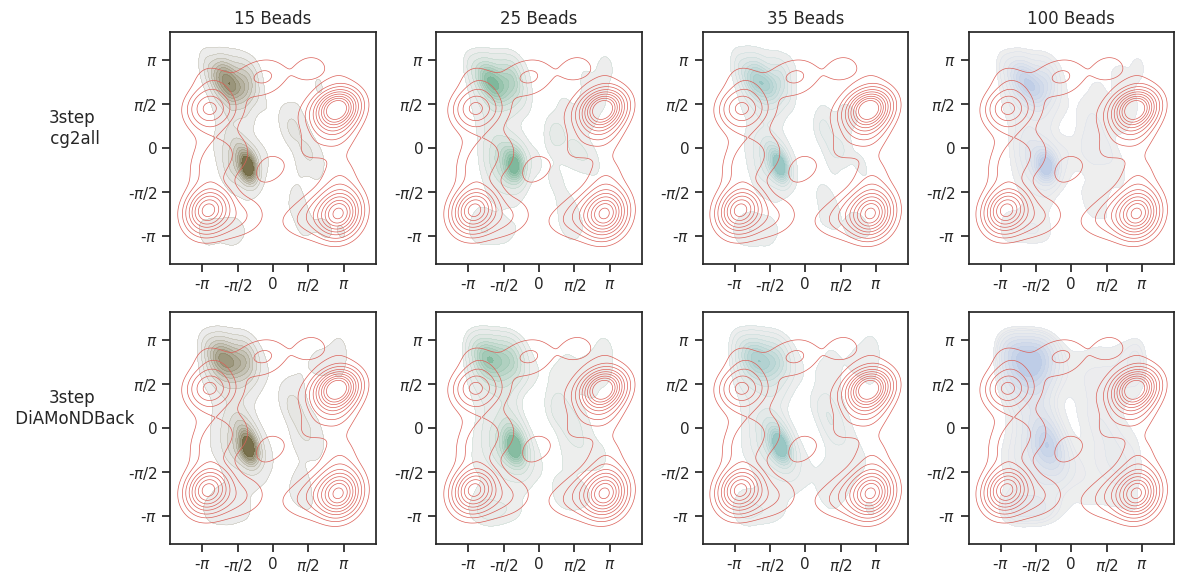

In [55]:
plot_ramachandran(plpro_3step_dih, phi_psi_true_plpro, plpro_palettes_3step, colors_plpro_3step, 
                  threestep_ncgs_labels_plpro, 'plpro3step_ramachandran', 
                  step=['3step\n cg2all', '3step\n DiAMoNDBack'], figsize=(12, 6))

## Bond length distribution

In [44]:
def get_all_bonds(trj):
    bond_array = list()
    bond_array_set = list()
    for bond in trj.top.bonds:
        a1 = bond.atom1.element.symbol
        a2 = bond.atom2.element.symbol
        if set([a1, a2]) not in bond_array_set:
            bond_array_set.append(set([a1, a2]))
            bond_array.append([a1, a2])
    return np.array(bond_array)
def get_bond_array(trj, bond_type):
    #bond_set = set(bond_type.split('-'))
    bond_set = set(bond_type)
    bond_array = list()
    for bond in trj.top.bonds:
        a1 = bond.atom1
        a2 = bond.atom2
        true_bonds = set([a1.element.symbol, a2.element.symbol])
        if true_bonds == bond_set:
            bond_array.append([a1.index, a2.index])
    return np.array(bond_array)

In [45]:
def plot_bond(real_trj, cg_traj, bond_type, bm_method, plot_real=True, ax=None, title=True, label=True, alpha=None, color=None):
    real_bonds = get_bond_array(real_trj, bond_type=bond_type)
    lengths_real = md.compute_distances(real_trj, real_bonds)
    lengths_cg = md.compute_distances(cg_traj, real_bonds)
    # convert to angstroms
    lengths_real = lengths_real * 10
    lengths_cg = lengths_cg * 10
    min_val = lengths_real.min()
    max_val = lengths_real.max()
    bins=np.linspace(min_val, max_val, 50)
    # if ax is None:
    #plt.hist(lengths_real.flatten(), bins=bins, label='Reference atomistic', histtype='stepfilled',edgecolor='black', density=True);
    #plt.hist(lengths_cg.flatten(), alpha=0.5, bins=bins, label='CG reconstructed', histtype='stepfilled',edgecolor='black', density=True);
    #plt.legend()
    #plt.title(f"{bond_type[0]}-{bond_type[1]}",fontsize=15)
    # x label is angstroms
    #plt.xlabel('Å', fontsize=15)
    if plot_real:
        sns.histplot(lengths_real.flatten(), bins=bins, label='Reference', stat='density',color='gray', ax=ax, alpha=0.9);
    # do not label y axis
    sns.histplot(lengths_cg.flatten(), alpha=alpha, bins=bins, label=f'{bm_method}', stat='density', color=color);
    plt.ylabel('')
    #ax.legend()
    if title:
        ax.set_title(f"{bond_type[0]}-{bond_type[1]}")
    #ax.set_xlabel('Å')

In [9]:
gt_traj_eIF4E = md.load(ground_truth)
ncgs5_traj_eIF4E_cg2all = md.load(ncgs5_eIF4E_cg2all)
ncgs10_traj_eIF4E_cg2all = md.load(ncgs10_eIF4E_cg2all)
ncgs19_traj_eIF4E_cg2all = md.load(ncgs19_eIF4E_cg2all)
ncgs50_traj_eIF4E_cg2all = md.load(ncgs50_eIF4E_cg2all)
ncgs5_traj_eIF4E_genzprot = md.load(ncgs5_eIF4E_genzprot)
ncgs10_traj_eIF4E_genzprot = md.load(ncgs10_eIF4E_genzprot)
ncgs19_traj_eIF4E_genzprot = md.load(ncgs19_eIF4E_genzprot)
ncgs50_traj_eIF4E_genzprot = md.load(ncgs50_eIF4E_genzprot)
ncgs5_traj_eIF4E_diffback = md.load(ncgs5_eIF4E_diffback)
ncgs10_traj_eIF4E_diffback = md.load(ncgs10_eIF4E_diffback)
ncgs19_traj_eIF4E_diffback = md.load(ncgs19_eIF4E_diffback)
ncgs50_traj_eIF4E_diffback = md.load(ncgs50_eIF4E_diffback)
ncgs10_1step_traj_eIF4E = md.load(ncgs_10_1step)
ncgs19_1step_traj_eIF4E = md.load(ncgs_19_1step)
ncgs50_1step_traj_eIF4E = md.load(ncgs_50_1step)

In [10]:
gt_traj_plpro = md.load(ground_truth_plpro)
ncgs5_traj_plpro_cg2all = md.load(ncgs5_plpro_cg2all)
ncgs15_traj_plpro_cg2all = md.load(ncgs15_plpro_cg2all)
ncgs25_traj_plpro_cg2all = md.load(ncgs25_plpro_cg2all)
ncgs35_traj_plpro_cg2all = md.load(ncgs35_plpro_cg2all)
ncgs100_traj_plpro_cg2all = md.load(ncgs100_plpro_cg2all)
ncgs5_traj_plpro_diffback = md.load(ncgs5_plpro_diffback)
ncgs15_traj_plpro_diffback = md.load(ncgs15_plpro_diffback)
ncgs25_traj_plpro_diffback = md.load(ncgs25_plpro_diffback)
ncgs35_traj_plpro_diffback = md.load(ncgs35_plpro_diffback)
ncgs100_traj_plpro_diffback = md.load(ncgs100_plpro_diffback)
ncgs25_1step_traj_plpro = md.load(ncgs25_1step_plpro)
ncgs35_1step_traj_plpro = md.load(ncgs35_1step_plpro)
ncgs100_1step_traj_plpro = md.load(ncgs100_1step_plpro)

In [12]:
ncgs_5_100_traj_3step_plpro_cg2all = md.load(ncgs5_100_3step_plpro_cg2all)
ncgs_5_35_traj_3step_plpro_cg2all = md.load(ncgs5_35_3step_plpro_cg2all)
ncgs_5_25_traj_3step_plpro_cg2all = md.load(ncgs5_25_3step_plpro_cg2all)
ncgs_5_15_traj_3step_plpro_cg2all = md.load(ncgs5_15_3step_plpro_cg2all)


In [13]:
ncgs_5_100_traj_3step_plpro_diffback = md.load(ncgs5_100_3step_plpro_diffback)
ncgs_5_35_traj_3step_plpro_diffback = md.load(ncgs5_35_3step_plpro_diffback)
ncgs_5_25_traj_3step_plpro_diffback = md.load(ncgs5_25_3step_plpro_diffback)
ncgs_5_15_traj_3step_plpro_diffback = md.load(ncgs5_15_3step_plpro_diffback)

In [233]:
ncgs5_traj_eIF4E_cg2all = ncgs5_traj_eIF4E_cg2all.center_coordinates()
ncgs10_traj_eIF4E_cg2all = ncgs10_traj_eIF4E_cg2all.center_coordinates()
ncgs19_traj_eIF4E_cg2all = ncgs19_traj_eIF4E_cg2all.center_coordinates()
ncgs50_traj_eIF4E_cg2all = ncgs50_traj_eIF4E_cg2all.center_coordinates()
ncgs5_traj_eIF4E_genzprot = ncgs5_traj_eIF4E_genzprot.center_coordinates()
ncgs10_traj_eIF4E_genzprot = ncgs10_traj_eIF4E_genzprot.center_coordinates()
ncgs19_traj_eIF4E_genzprot = ncgs19_traj_eIF4E_genzprot.center_coordinates()
ncgs50_traj_eIF4E_genzprot = ncgs50_traj_eIF4E_genzprot.center_coordinates()
ncgs5_traj_eIF4E_diffback = ncgs5_traj_eIF4E_diffback.center_coordinates()
ncgs10_traj_eIF4E_diffback = ncgs10_traj_eIF4E_diffback.center_coordinates()
ncgs19_traj_eIF4E_diffback = ncgs19_traj_eIF4E_diffback.center_coordinates()
ncgs50_traj_eIF4E_diffback = ncgs50_traj_eIF4E_diffback.center_coordinates()
gt_traj_eIF4E = gt_traj_eIF4E.center_coordinates()

In [268]:
ncgs5_traj_plpro_cg2all = ncgs5_traj_plpro_cg2all.center_coordinates()
ncgs15_traj_plpro_cg2all = ncgs15_traj_plpro_cg2all.center_coordinates()
ncgs25_traj_plpro_cg2all = ncgs25_traj_plpro_cg2all.center_coordinates()
ncgs35_traj_plpro_cg2all = ncgs35_traj_plpro_cg2all.center_coordinates()
ncgs100_traj_plpro_cg2all = ncgs100_traj_plpro_cg2all.center_coordinates()
ncgs5_traj_plpro_diffback = ncgs5_traj_plpro_diffback.center_coordinates()
ncgs15_traj_plpro_diffback = ncgs15_traj_plpro_diffback.center_coordinates()
ncgs25_traj_plpro_diffback = ncgs25_traj_plpro_diffback.center_coordinates()
ncgs35_traj_plpro_diffback = ncgs35_traj_plpro_diffback.center_coordinates()
ncgs100_traj_plpro_diffback = ncgs100_traj_plpro_diffback.center_coordinates()
gt_traj_plpro = gt_traj_plpro.center_coordinates()

In [54]:
def bond_fraction(trj_ref, trj_gen, fraction=0.1):
    '''Fraction of bonds within X percent of the reference'''

    bond_pairs = [[b[0].index, b[1].index] for b in trj_ref.top.bonds]
    ref_dist = md.compute_distances(trj_ref, bond_pairs)
    gen_dist = md.compute_distances(trj_gen, bond_pairs)

    bond_frac = np.sum((gen_dist < (1+fraction)*ref_dist) & 
                       (gen_dist > (1-fraction)*ref_dist))

    bond_frac = bond_frac / np.size(ref_dist)
    
    return bond_frac

In [87]:
bond_fraction(ncgs_5_100_traj_3step_plpro_cg2all, gt_traj_plpro, fraction=0.1)

0.21181162221363226

In [46]:
all_bonds = get_all_bonds(gt_traj_plpro)

In [47]:
all_bonds = all_bonds[:-1]

In [48]:
print(all_bonds)

[['C' 'C']
 ['C' 'O']
 ['N' 'C']
 ['S' 'C']]


In [51]:
# remove first and last residue from trajectory as they are not in the CG models
#gt_traj_correct = gt_traj_correct.atom_slice(gt_traj_correct.top.select('not (resid 0 or resid 180)'))

In [235]:
#ncgs10_traj_eIF4E_genzprot, ncgs19_traj_eIF4E_genzprot, ncgs50_traj_eIF4E_genzprot
ncg5_eIF4E_trajs = [ncgs5_traj_eIF4E_genzprot, ncgs5_traj_eIF4E_cg2all, ncgs5_traj_eIF4E_diffback]
ncg10_eIF4E_trajs = [ncgs10_1step_traj_eIF4E, ncgs10_traj_eIF4E_genzprot, ncgs10_traj_eIF4E_cg2all, ncgs10_traj_eIF4E_diffback]
ncg19_eIF4E_trajs = [ncgs19_1step_traj_eIF4E, ncgs19_traj_eIF4E_genzprot, ncgs19_traj_eIF4E_cg2all, ncgs19_traj_eIF4E_diffback]
ncg50_eIF4E_trajs = [ncgs50_1step_traj_eIF4E, ncgs50_traj_eIF4E_genzprot, ncgs50_traj_eIF4E_cg2all, ncgs50_traj_eIF4E_diffback]
all_eIF4E_trajs = [ncg5_eIF4E_trajs, ncg10_eIF4E_trajs, ncg19_eIF4E_trajs, ncg50_eIF4E_trajs]

In [270]:
ncg5_plpro_trajs = [ncgs5_traj_plpro_cg2all, ncgs5_traj_plpro_diffback]
ncg15_plpro_trajs = [ncgs15_traj_plpro_cg2all, ncgs15_traj_plpro_diffback]
ncg25_plpro_trajs = [ncgs25_1step_traj_plpro, ncgs25_traj_plpro_cg2all, ncgs25_traj_plpro_diffback]
ncg35_plpro_trajs = [ncgs35_1step_traj_plpro, ncgs35_traj_plpro_cg2all, ncgs35_traj_plpro_diffback]
ncg100_plpro_trajs = [ncgs100_1step_traj_plpro, ncgs100_traj_plpro_cg2all, ncgs100_traj_plpro_diffback]
all_plpro_trajs = [ncg5_plpro_trajs, ncg15_plpro_trajs, ncg25_plpro_trajs, ncg35_plpro_trajs, ncg100_plpro_trajs]

In [40]:
all_5bead_plpro_trajs = [[ncgs5_traj_plpro_diffback, ncgs_5_15_traj_3step_plpro_diffback, ncgs_5_25_traj_3step_plpro_diffback, ncgs_5_35_traj_3step_plpro_diffback, ncgs_5_100_traj_3step_plpro_diffback]]


In [61]:

def plot_bond_dist(trajs, gt_traj, all_bonds, cg_labels, special_num, steps=None, lab='bond_length_dist', colors=None,alphas=None):
    fig = plt.figure(figsize=(12, 9))
    gs = gridspec.GridSpec(5, 4, figure=fig)

    # Create a subplot for the bond plots
    for i, bond in enumerate(all_bonds):
        for j, traj_set in enumerate(trajs):
            if j == 0:
                title = True
            else:
                title = False
            if j < special_num:
                add = 1
            else:
                add = 0
            ax_bond = fig.add_subplot(gs[j, i])
            for k, traj in enumerate(traj_set):
                if k == 0:
                    plot_real = True
                else:
                    plot_real = False
                plot_bond(gt_traj, traj, bond, steps[add+k], ax=ax_bond, plot_real=plot_real, title=title, alpha=alphas[add+k], color=colors[add+k])
            
    # label rows with number of cg beads
    for i, ax in enumerate(fig.axes):
        if i < len(cg_labels):
            ax.set_ylabel(f'{cg_labels[i]} Beads', rotation=0, labelpad=60, fontsize=12)
    # leg = fig.legend(['Reference'] + steps, loc='upper left', fontsize=7)
    # # get legend
    # for i in range(len(colors[0:3])):
    #     leg.legendHandles[i+1].set_color(colors[i])
    plt.tight_layout()
    plt.show()
    fig.savefig(f'{lab}.png', dpi=500)


/home/erin/miniconda3/envs/pytorch/lib/python3.9/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/home/erin/miniconda3/envs/pytorch/lib/python3.9/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/tmp/ipykernel_618353/4257619213.py:31: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[i+1].set_color(colors[i])


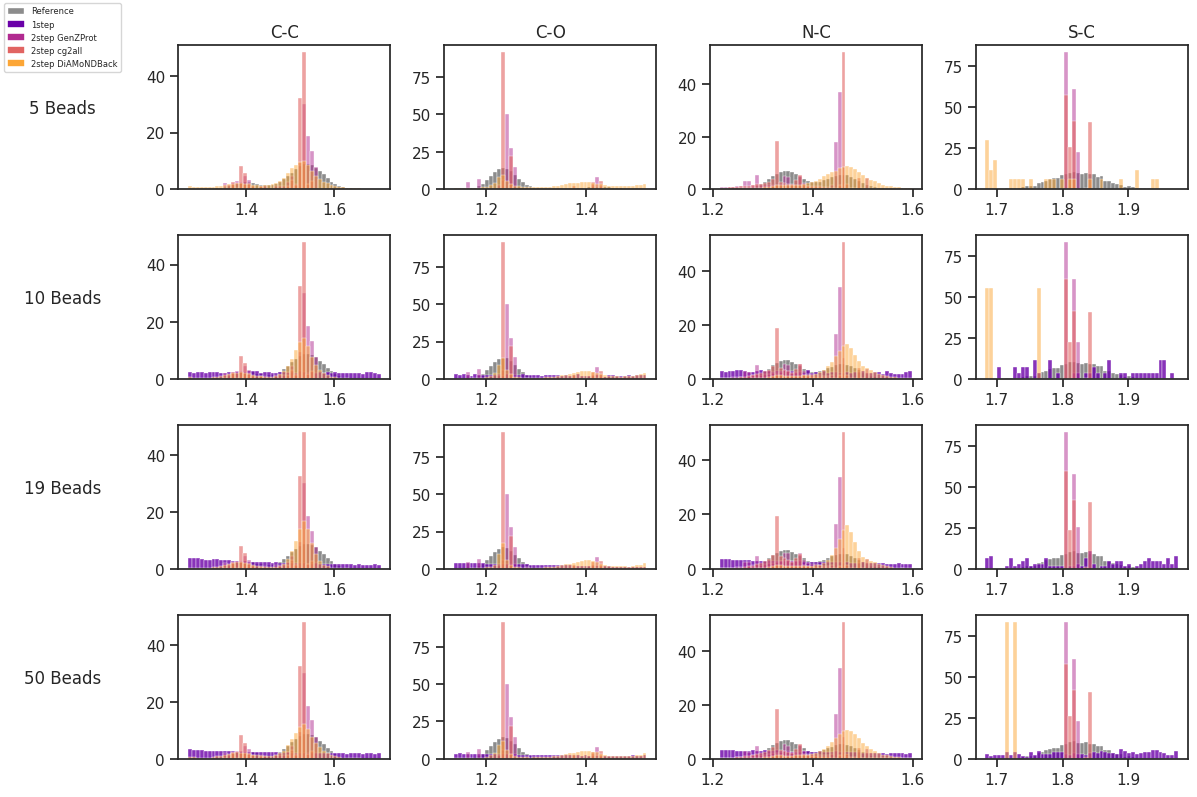

In [260]:
plot_bond_dist(all_eIF4E_trajs, gt_traj_eIF4E, all_bonds, cg_labels=[5, 10, 19, 50], lab='eIF4E_all_bond_length_dist', 
               steps=['1step', '2step GenZProt', '2step cg2all', '2step DiAMoNDBack'], special_num=1, colors=sns.color_palette(palette='plasma', n_colors=4), alphas=[0.8, 0.5, 0.6, 0.5])

In [57]:
plot_bond_dist(all_plpro_trajs, gt_traj_plpro, all_bonds, cg_labels=[5, 15, 25, 35, 100], lab='plpro_all_bond_length_dist', 
               steps=['1step', '2step cg2all', '2step DiAMoNDBack'], special_num=2, colors=sns.color_palette(palette='viridis', n_colors=3), alphas=[0.6, 0.5, 0.6])

NameError: name 'all_plpro_trajs' is not defined

In [51]:
sns.set_theme(style="ticks")

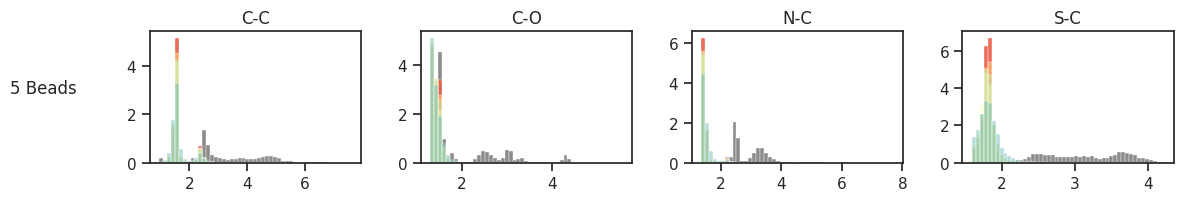

In [62]:
plot_bond_dist(all_5bead_plpro_trajs, gt_traj_plpro, all_bonds, cg_labels=[5], lab='plpro_extra_bond_length_dist_nolegend', 
               steps=['2step DiAMoNDBack', '3step-15 bead', '3step-25 bead', '3step-35 bead', '3step-100 bead'], special_num=0, colors=sns.color_palette(palette='Spectral', n_colors=5), alphas=[0.9, 0.7, 0.6, 0.5, 0.4])

## Metrics

In [14]:
eIF4E_data_onestep = pd.read_csv('/home/erin/Documents/rmsds/1step_eIF4E.csv')
eIF4E_data_cg2all = pd.read_csv('/home/erin/Documents/rmsds/2step_eIF4E_cg2all.csv')
eIF4E_data_genzprot = pd.read_csv('/home/erin/Documents/rmsds/2step_eIF4E_genzprot.csv')
eIF4E_data_diffback = pd.read_csv('/home/erin/Documents/rmsds/2step_eIF4E_diffback.csv')
plpro_data_onestep = pd.read_csv('/home/erin/Documents/rmsds/1step_sarscov2.csv')
plpro_data_cg2all = pd.read_csv('/home/erin/Documents/rmsds/2step_sarscov2_cg2all.csv')
plpro_data_diffback = pd.read_csv('/home/erin/Documents/rmsds/2step_sarscov2_diffback.csv')

In [15]:
# combine onestep and twostep dataframes with new column for method
eIF4E_data_onestep['method'] = 'One-step'
eIF4E_data_cg2all['method'] = 'Two-step cg2all'
eIF4E_data_genzprot['method'] = 'Two-step GenZProt'
eIF4E_data_diffback['method'] = 'Two-step DiAMoNDBack'
plpro_data_onestep['method'] = 'One-step'
plpro_data_cg2all['method'] = 'Two-step cg2all'
plpro_data_diffback['method'] = 'Two-step DiAMoNDBack'

eIF4E_data_rmsd = pd.concat([eIF4E_data_onestep, eIF4E_data_cg2all, eIF4E_data_genzprot, eIF4E_data_diffback])
plpro_data_rmsd = pd.concat([plpro_data_onestep, plpro_data_cg2all, plpro_data_diffback])

In [8]:
eIF4E_data_rmsd

,nbead,natom_bead,rmsd,method,nres_bead
0,10,294.5,7.792474,One-step,NaN
1,19,155.0,2.926917,One-step,NaN
2,50,58.9,1.562698,One-step,NaN
0,5,589.0,0.221543,Two-step cg2all,36.20
1,10,294.5,0.163118,Two-step cg2all,18.10
2,19,155.0,0.161894,Two-step cg2all,0.00
3,50,58.9,0.152486,Two-step cg2all,3.62
0,5,589.0,2.332600,Two-step GenZProt,36.20
1,10,294.5,1.342256,Two-step GenZProt,18.10
2,19,155.0,1.264504,Two-step GenZProt,0.00


In [16]:
plpro_data_rmsd

,nbead,nres_bead,natom_bead,rmsd,method
0,25,12.800000,201.400000,6.262200,One-step
1,35,9.142857,143.857143,3.448420,One-step
2,100,3.200000,50.350000,2.493196,One-step
0,5,64.000000,1007.000000,0.316424,Two-step cg2all
1,15,21.333333,335.666667,0.315680,Two-step cg2all
2,25,12.800000,201.400000,0.318502,Two-step cg2all
3,35,9.142857,143.857143,0.316164,Two-step cg2all
4,100,3.200000,50.350000,0.314462,Two-step cg2all
0,5,64.000000,1007.000000,0.306000,Two-step DiAMoNDBack
1,15,21.333333,335.666667,0.308063,Two-step DiAMoNDBack


In [9]:
sns.set_theme(style="darkgrid")

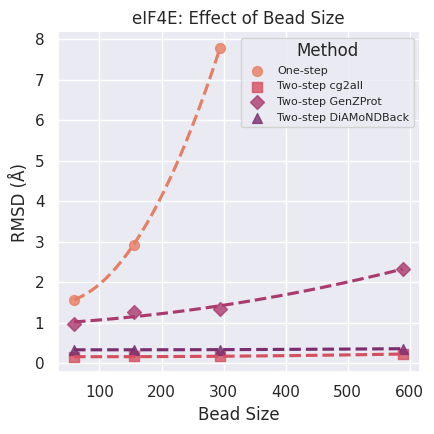

In [11]:
# use seaborn to plot the two eIF4E datasets
# fit a line to the data
sns.lmplot(data=eIF4E_data_rmsd, x='natom_bead', y='rmsd', scatter=True, line_kws={'linestyle':'--'}, hue='method', palette='flare', order=2, ci=None
           ,legend=False, height=4.5, aspect=1, markers=['o', 's', 'D', '^'], )
plt.title('eIF4E: Effect of Bead Size')
plt.xlabel('Bead Size')
plt.ylabel('RMSD (Å)')
plt.legend(title='Method', fontsize=8)
plt.tight_layout()
plt.savefig('eIF4E_rmsd_smaller_wequations.png', dpi=500)

/tmp/ipykernel_866718/788641596.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


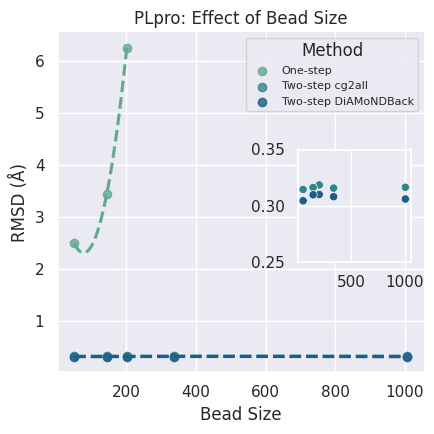

In [36]:
sns.lmplot(data=plpro_data_rmsd, x='natom_bead', y='rmsd', scatter=True, line_kws={'linestyle':'--'}, hue='method', palette='crest', order=2, 
           legend=False,
           ci=None, height=4.5, aspect=1)
plt.title('PLpro: Effect of Bead Size')
plt.xlabel('Bead Size')
plt.ylabel('RMSD (Å)')
plt.legend(title='Method', loc="best", fontsize=8)
# inset plot to focus on twostep methods
ax2 = plt.axes([0.68, 0.4, .25, .25])
sns.scatterplot(data=plpro_data_rmsd, x='natom_bead', y='rmsd', hue='method', palette='crest', ax=ax2, legend=False)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_ylim(0.25, 0.35)

plt.tight_layout()
plt.savefig('sarscov2_rmsd_smaller.png', dpi=500)

In [4]:
def ged_score_atoms(trj_ref, trj_gen, scale=1.3):
    
    pairs = []
    pair_names = []
    a_list = [a.name for a in trj_ref.top.atoms]
    n_atoms = len(a_list)
    
    # use the same cutoff for N-C-O
    cut_arr = np.zeros((len(a_list), len(a_list))) + 0.68*2
    
    for i, i_name in enumerate(a_list):
        for j, j_name in enumerate(a_list):
            
            pairs.append([i,j])
            pair_names.append([i_name, j_name])
            
            if 'S' in i_name and 'S' in j_name:
                cut_arr[i, j] = 1.02*2
                
            elif 'S' in i_name or 'S' in j_name:
                cut_arr[i, j] = 0.68+1.02

    ref_dist = md.compute_distances(trj_ref, pairs).reshape(-1, n_atoms, n_atoms)
    gen_dist = md.compute_distances(trj_gen, pairs).reshape(-1, n_atoms, n_atoms)
    
    ref_bonds = ref_dist < cut_arr*scale
    gen_bonds = gen_dist < cut_arr*scale
    
    #diff = ref_bonds.astype(np.float32) - gen_bonds.astype(np.float32) 
    #diff_mean = np.mean(abs(diff))
    
    diff_mean = abs(np.sum(ref_bonds.astype(np.float32) - gen_bonds.astype(np.float32))) / np.sum(ref_bonds)
    
    return diff_mean

In [77]:
ged_score_atoms(gt_traj_plpro, ncgs_5_100_traj_3step_plpro_cg2all)

0.01574438497283785

In [1]:
def rmsd_score(trj_ref, trj_gen):
    
    rmsd_list = []
    for i, (trj_r, trj_g) in enumerate(zip(trj_ref, trj_gen)):
        rmsd = md.rmsd(trj_r, trj_g)*10
        rmsd_list.append(rmsd)
    
    return np.mean(rmsd_list)

In [17]:
ground_truth_plpro = "/home/erin/Documents/cg2all/2step/sarscov2/FG_ground_truth_clean.pdb"
ncgs5_plpro_diffback_finetuned = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_plpro/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-16/ncg5_recon_gen_0.pdb"

In [8]:
ground_truth_eIF4E = "/home/erin/Documents/cg2all/2step/eIF4E/FG_ground_truth_clean.pdb"
ncgs5_eIF4E_diffback_finetuned = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_finetune_eIF4E/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-16/ncg5_recon_gen_0.pdb"

In [18]:
def clean_traj(traj):
    """
    Clean a trajectory by removing the hydrogens and stripping first and last residue
    """
    # get number of residues
    residues = traj.topology.n_residues
    last_residue = residues - 2
    noH_traj = traj.topology.select("not element H")
    traj = traj.atom_slice(noH_traj)
    traj = traj.atom_slice(traj.topology.select(f"resid 1 to {last_residue}"))
    return traj

In [19]:
ncgs5_plpro_diffback_finetuned = md.load(ncgs5_plpro_diffback_finetuned)
ncgs5_plpro_diffback_finetuned = clean_traj(ncgs5_plpro_diffback_finetuned)

In [9]:
ncgs5_eIF4E_diffback_finetuned = md.load(ncgs5_eIF4E_diffback_finetuned)
ncgs5_eIF4E_diffback_finetuned = clean_traj(ncgs5_eIF4E_diffback_finetuned)

In [57]:
ncgs5_plpro_diffback_finetuned.save('/home/erin/Documents/DiAMoNDBack/gen_outputs/train_finetune_plpro/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-14/ncg5_recon_gen_0_clean.pdb')

In [21]:
ncgs100_plpro_diffback_orig = md.load("/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/plpro/ncg100_recon_gen_0_clean.pdb")

In [24]:
ncgs100_plpro_cg2all_orig = md.load("/home/erin/Documents/cg2all/2step/sarscov2/ncg100_FG_recon_clean.pdb")

In [20]:
gt_traj_plpro = md.load(ground_truth_plpro)

In [10]:
gt_traj_eIF4E = md.load(ground_truth_eIF4E)

In [22]:
another_one = md.load("/home/erin/Documents/DiAMoNDBack/gen_outputs/train_finetune_plpro/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-14/ncg5_recon_gen_0_clean.pdb")

In [29]:
another_other_one = md.load("/home/erin/Documents/DiAMoNDBack/gen_outputs/train_finetune_plpro/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-12/ncg5_recon_gen_0_at11.pdb")

In [30]:
another_other_one = clean_traj(another_other_one)

In [21]:
rmsd_score(gt_traj_plpro, ncgs5_plpro_diffback_finetuned)

2.9854276

In [23]:
rmsd_score(gt_traj_plpro, another_one)

2.9829679

In [31]:
rmsd_score(gt_traj_plpro, another_other_one)

2.9834254

In [11]:
rmsd_score(gt_traj_eIF4E, ncgs5_eIF4E_diffback_finetuned)

4.0824375

In [7]:
ncgs5_eIF4E_cg2all='/home/erin/Documents/cg2all/2step/eIF4E/ncg5_FG_recon_clean.pdb'
ncgs10_eIF4E_cg2all= '/home/erin/Documents/cg2all/2step/eIF4E/ncg10_FG_recon_clean.pdb'
ncgs19_eIF4E_cg2all='/home/erin/Documents/cg2all/2step/eIF4E/ncg19_FG_recon_clean.pdb'
ncgs50_eIF4E_cg2all= '/home/erin/Documents/cg2all/2step/eIF4E/ncg50_FG_recon_clean.pdb' 
#pdb_trunc = '/home/erin/Documents/CoarseGrainingVAE/data/eIF4E/truncated.pdb'
#ncgs10_data = get_dihedrals(ncgs10, pdb_trunc)
ground_truth = '/home/erin/Documents/cg2all/2step/eIF4E/FG_ground_truth_clean.pdb'
#pdb = '/home/erin/Documents/CoarseGrainingVAE/data/eIF4E/eIF4E.pdb'
ncgs_10_1step = '/home/erin/Documents/CoarseGrainingVAE/scripts/final_data/mxr2b3ec_recon.pdb'
ncgs_19_1step = '/home/erin/Documents/CoarseGrainingVAE/scripts/final_data/nlxj8a4v_recon.pdb'
ncgs_50_1step = '/home/erin/Documents/CoarseGrainingVAE/scripts/final_data/s1954b2s_recon.pdb'
ground_truth_1step = '/home/erin/Documents/CoarseGrainingVAE/data/eIF4E/test_true.pdb'
pdb_1step = '/home/erin/Documents/CoarseGrainingVAE/data/eIF4E/top.pdb'

In [8]:
ncgs5_eIF4E_genzprot = "/home/erin/Documents/CoarseGrainingVAE/scripts/final_data/ncgs_5reconstructed_FG_traj.pdb"
ncgs10_eIF4E_genzprot = "/home/erin/Documents/CoarseGrainingVAE/scripts/final_data/1xgt0cil_ncgs10_recon/ncgs_181reconstructed_FG_traj.pdb"
ncgs19_eIF4E_genzprot = "/home/erin/Documents/CoarseGrainingVAE/scripts/final_data/z58m9lxr_ncgs19_recon/ncgs_181reconstructed_FG_traj.pdb"
ncgs50_eIF4E_genzprot = "/home/erin/Documents/CoarseGrainingVAE/scripts/final_data/t6gcmgrz_ncgs50_recon/ncgs_181reconstructed_FG_traj.pdb"
ncgs5_eIF4E_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/eIF4E/eIF4Encg5_recon_gen_0_clean.pdb"
ncgs10_eIF4E_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/eIF4E/1xgt0cil_recon_gen_0_clean.pdb"
ncgs19_eIF4E_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/eIF4E/z58m9lxr_recon_gen_0_clean.pdb"
ncgs50_eIF4E_diffback = "/home/erin/Documents/DiAMoNDBack/gen_outputs/train_PDB_DES-FT/32-1-2-4-8-b128-lr1.0e-05-gamma1.0--rescale20.0-_ckp-15/eIF4E/t6gcmgrz_recon_gen_0_clean.pdb"

In [9]:
import numpy as np
from scipy.stats import entropy
import MDAnalysis as mda
from MDAnalysis.analysis.dihedrals import Dihedral

def calculate_jsd(p, q):
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m) + entropy(q, m))

def compute_dihedral_jsd(universe1, universe2):
    # Define dihedral types
    dihedral_types = ['phi', 'psi', 'omega']

    jsd_results = {}

    for i, dihedral_name in enumerate(dihedral_types):
        # Calculate dihedrals for both universes
        if dihedral_name == 'phi':
            dihedrals1 = Dihedral([res.phi_selection() for res in universe1.residues][1:]).run()
            dihedrals2 = Dihedral([res.phi_selection() for res in universe2.residues][1:]).run()
        elif dihedral_name == 'psi':
            dihedrals1 = Dihedral([res.psi_selection() for res in universe1.residues][:-1]).run()
            dihedrals2 = Dihedral([res.psi_selection() for res in universe2.residues][:-1]).run()
        elif dihedral_name == 'omega':
            dihedrals1 = Dihedral([res.omega_selection() for res in universe1.residues][:-1]).run()
            dihedrals2 = Dihedral([res.omega_selection() for res in universe2.residues][:-1]).run()
        

        # Flatten the dihedral arrays
        angles1 = dihedrals1.results.angles.flatten()
        angles2 = dihedrals2.results.angles.flatten()

        # Create histograms (36 bins of 10 degrees each)
        hist1, _ = np.histogram(angles1, bins=36, range=(-180, 180))
        hist2, _ = np.histogram(angles2, bins=36, range=(-180, 180))

        # Normalize histograms to create probability distributions
        p = hist1 / np.sum(hist1)
        q = hist2 / np.sum(hist2)

        # Calculate Jensen-Shannon divergence
        jsd = calculate_jsd(p, q)
        jsd_results[dihedral_name] = jsd

    return jsd_results

# Load your structures or trajectories
universe1 = mda.Universe(ncgs_50_1step)  # or trajectory1.dcd
universe2 = mda.Universe(ground_truth)  # or trajectory2.dcd

# Compute JSD for all dihedral types
jsd_results = compute_dihedral_jsd(universe1, universe2)

# Print results
for dihedral_name, jsd in jsd_results.items():
    print(f"JSD for {dihedral_name}: {jsd}")

# Calculate average JSD across all dihedral types
avg_jsd = np.mean(list(jsd_results.values()))
print(f"Average JSD across all dihedral types: {avg_jsd}")

/home/erin/miniconda3/envs/pytorch/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:447: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


JSD for phi: 0.07164585666797851
JSD for psi: 0.07129795397491626
JSD for omega: 0.1749492858512715
Average JSD across all dihedral types: 0.10596436549805544
